In [16]:
# Standard libraries
import pandas as pd
import pickle

# Visualizations

# Machine Learning
from sklearn.ensemble import RandomForestRegressor

# Enable auto-reload for module reloading during development
%load_ext autoreload
%autoreload 2

# Set display options for Pandas to show all columns
pd.set_option('display.max_columns', None)

# Load custom scripts

import utils.decision_tree as dt
import utils.random_forest as rf
from utils.common_viz import model_validation


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# Load dataset
assets = pd.read_csv('../datasets/king_country_houses_aa.csv')

In [18]:
# Copy of the data
df = assets.copy()

In [19]:
# Selecting features 
correlated_columns = dt.selecting_features(df, corr_coef=0.25)

Features with correlation coefficient with price > than 0.25
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 



In [20]:
X_train, X_test, y_train, y_test = dt.select_training_set(df, correlated_columns, test_size=0.4)

🔹 Test size 40%:
  Training set size: 12967 | Test set size: 8646


In [21]:
results_df, results_list, model_tree = rf.train_random_forest(X_train, X_test, y_train, y_test)
results_df.head()

  Model Metrics: | R2 = 0.7997 | RMSE = 173035.2399 | MAE = 91990.7693 | MSE = 29941194234.1894 |
✅ The model performs well! It explains a large portion of the variance.



,Actual Price,Predicted Price,Difference
735,365000.0,387090.50,-22090.50
2830,865000.0,814146.34,50853.66
4106,1038000.0,1154170.50,-116170.50
16218,1490000.0,1607150.00,-117150.00
19964,711000.0,786117.38,-75117.38


In [22]:
# Testing different test sizes
results_list = rf.create_train_test_splits_and_evaluate(df, correlated_columns)

🔹 Test size 10%:
  Training set size: 19451 | Test set size: 2162
  Model Metrics: | R2 = 0.8092 | RMSE = 166723.9813 | MAE = 90928.3927 | MSE = 27796885951.3061 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 20%:
  Training set size: 17290 | Test set size: 4323


KeyboardInterrupt: 

In [ ]:
# This cell runs ~2 mins
# Evaluating different test_size and features
results_df = rf.evaluate_different_correlations(df)

Features with correlation coefficient with price > than 0.2
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 

🔹 Test size 10%:
  Training set size: 19451 | Test set size: 2162
  Model Metrics: | R2 = 0.8092 | RMSE = 166723.9813 | MAE = 90928.3927 | MSE = 27796885951.3061 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 20%:
  Training set size: 17290 | Test set size: 4323
  Model Metrics: | R2 = 0.7821 | RMSE = 181477.2275 | MAE = 91283.5313 | MSE = 32933984102.1002 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 30%:
  Training set size: 15129 | Test set size: 6484
  Model Metrics: | R2 = 0.7873 | RMSE = 175247.7263 | MAE = 91397.1064 | MSE = 30711765578.8143 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 40%:
  Training set size: 12967 |

In [10]:
# A resume of metrics for test_size and features
results_df.head(55)

,Correlation Coefficient ≥,Test Size (%),R²,RMSE,MAE,MSE
0,0.20,0.1,0.809191,166723.981332,90928.392743,2.779689e+10
1,0.20,0.2,0.782149,181477.227503,91283.531339,3.293398e+10
2,0.20,0.3,0.787265,175247.726316,91397.106383,3.071177e+10
3,0.20,0.4,0.799705,173035.239862,91990.769341,2.994119e+10
4,0.25,0.1,0.809191,166723.981332,90928.392743,2.779689e+10
5,0.25,0.2,0.782149,181477.227503,91283.531339,3.293398e+10
6,0.25,0.3,0.787265,175247.726316,91397.106383,3.071177e+10
7,0.25,0.4,0.799705,173035.239862,91990.769341,2.994119e+10
8,0.30,0.1,0.790241,174806.960869,94316.134695,3.055747e+10
9,0.30,0.2,0.755374,192306.464557,94443.882685,3.698178e+10


In [11]:
# this cell runs ~ 
# Evaluating different test_size, features and number of trees
results_df = rf.evaluate_different_estimators(df)

Number of tree: 10
Features with correlation coefficient with price > than 0.2
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 

🔹 Test size 10%:
  Training set size: 19451 | Test set size: 2162
  Model Metrics: | R2 = 0.7911 | RMSE = 174467.9166 | MAE = 95504.8675 | MSE = 30439053910.9699 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 20%:
  Training set size: 17290 | Test set size: 4323
  Model Metrics: | R2 = 0.7727 | RMSE = 185357.9542 | MAE = 94311.7327 | MSE = 34357571182.1302 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 30%:
  Training set size: 15129 | Test set size: 6484
  Model Metrics: | R2 = 0.7691 | RMSE = 182586.0928 | MAE = 96040.4825 | MSE = 33337681300.228 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 40%:
  Training

KeyboardInterrupt: 

In [ ]:
# A resume of metrics for test_size, features ans estimators
results_df.head(55)

,Estimator,Correlation Coefficient ≥,Test Size (%),R²,RMSE,MAE,MSE
0,10,0.20,0.1,0.789464,175130.293504,95982.907343,3.067062e+10
1,10,0.20,0.2,0.772743,185353.770105,94299.430123,3.435602e+10
2,10,0.20,0.3,0.769076,182586.092845,96040.482474,3.333768e+10
3,10,0.20,0.4,0.777194,182499.796914,96179.119325,3.330618e+10
4,10,0.25,0.1,0.789464,175130.293504,95982.907343,3.067062e+10
5,10,0.25,0.2,0.772743,185353.770105,94299.430123,3.435602e+10
6,10,0.25,0.3,0.769076,182586.092845,96040.482474,3.333768e+10
7,10,0.25,0.4,0.777194,182499.796914,96179.119325,3.330618e+10
8,10,0.30,0.1,0.772386,182095.100495,99337.431001,3.315863e+10
9,10,0.30,0.2,0.729380,202265.950946,99004.567173,4.091151e+10


In [ ]:
# Cross validation
results, average = rf.cross_validate_model(df, correlated_columns)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.9721
Average Test R²:  0.81
✅ The model performs well on unseen data, explaining a large portion of the variance.



,Fold,Train R²,Test R²
0,1,0.9723,0.7730
1,2,0.9715,0.8094
2,3,0.9719,0.8160
3,4,0.9725,0.8351
4,5,0.9723,0.8165


In [13]:
#results_df = rf.perform_grid_search(df)

In [14]:
best_parameters = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
best_correlation = 0.25
best_test_size = 0.4
final_model = RandomForestRegressor(**best_parameters, random_state=42)

correlated_columns = dt.selecting_features(df, corr_coef=best_correlation)
X_train, X_test, y_train, y_test = dt.select_training_set(df, correlated_columns, test_size=best_test_size)
results_df, results_list, final_model = rf.train_random_forest(X_train, X_test, y_train, y_test, model_tree=final_model)

Features with correlation coefficient with price > than 0.25
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 

🔹 Test size 40%:
  Training set size: 12967 | Test set size: 8646
  Model Metrics: | R2 = 0.8005 | RMSE = 172696.9007 | MAE = 91816.5388 | MSE = 29824219524.6237 |
✅ The model performs well! It explains a large portion of the variance.



In [15]:
# Save the model
with open('../models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

In [ ]:
results, average = dt.cross_validate_model(df, correlated_columns, model_tree=final_model)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.9711
Average Test R²:  0.8145
✅ The model performs well on unseen data, explaining a large portion of the variance.



,Fold,Train R²,Test R²
0,1,0.9713,0.7808
1,2,0.9712,0.8140
2,3,0.9713,0.8226
3,4,0.9704,0.8351
4,5,0.9714,0.8202


c:\Users\Arturo\Documents\Annie_DAML_course\Week5\mini-project-ironkaggle\notebooks\scp\decision_tree.py:420: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([label.replace('_', ' ').title() for label in importance_df['Feature']], color='black')


,Feature,Importance
1,grade,0.359071
0,sqft_living,0.242265
8,lat,0.194255
3,sqft_living15,0.047251
9,waterfront,0.035437
2,sqft_above,0.028343
5,view,0.028266
4,bathrooms,0.027086
6,sqft_basement,0.020686
10,floors,0.009026


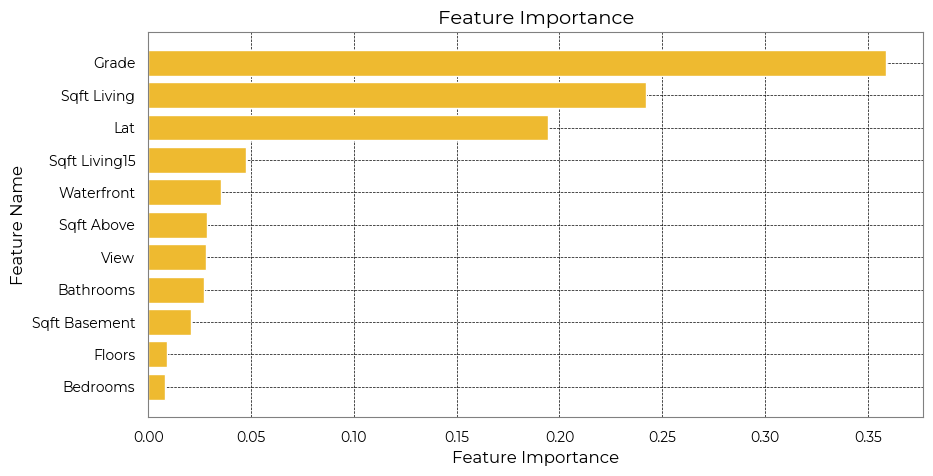

In [ ]:
# Get feature importance scores
importance_df = dt.feature_score(final_model, X_train)
importance_df

In [13]:
# Initialize RFE and select the top 5 features
correlated_columns, results_df, final_model = dt.feature_selection(final_model, X_train, X_test, y_train, y_test, features=11)

NameError: name 'final_model' is not defined

In [ ]:
results_df.head(5)

,Actual Price,Predicted Price,Difference
735,365000.0,3.957498e+05,-30749.806818
2830,865000.0,8.399796e+05,25020.352980
4106,1038000.0,1.177641e+06,-139640.758814
16218,1490000.0,1.596872e+06,-106872.315000
19964,711000.0,7.727767e+05,-61776.727577


In [ ]:
results, average = dt.cross_validate_model(df, correlated_columns, model_tree=final_model)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.9711
Average Test R²:  0.8145
✅ The model performs well on unseen data, explaining a large portion of the variance.



,Fold,Train R²,Test R²
0,1,0.9713,0.7808
1,2,0.9712,0.8140
2,3,0.9713,0.8226
3,4,0.9704,0.8351
4,5,0.9714,0.8202


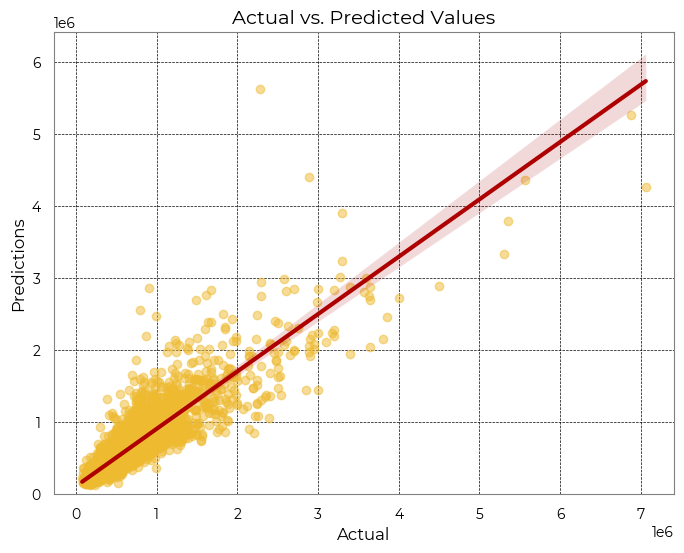

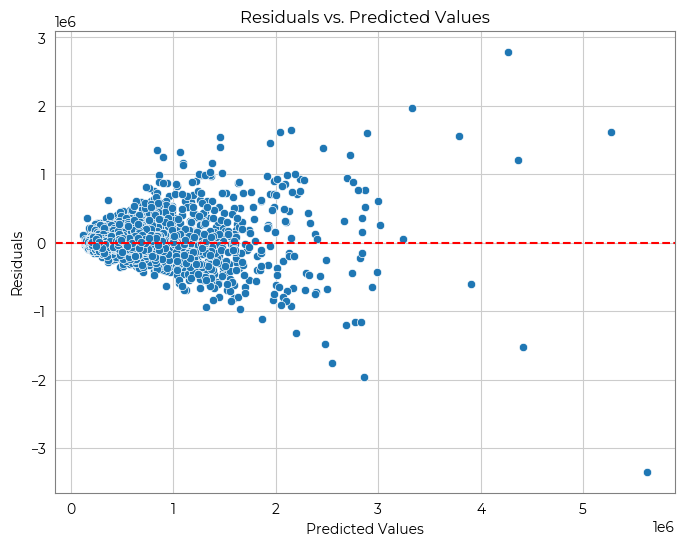

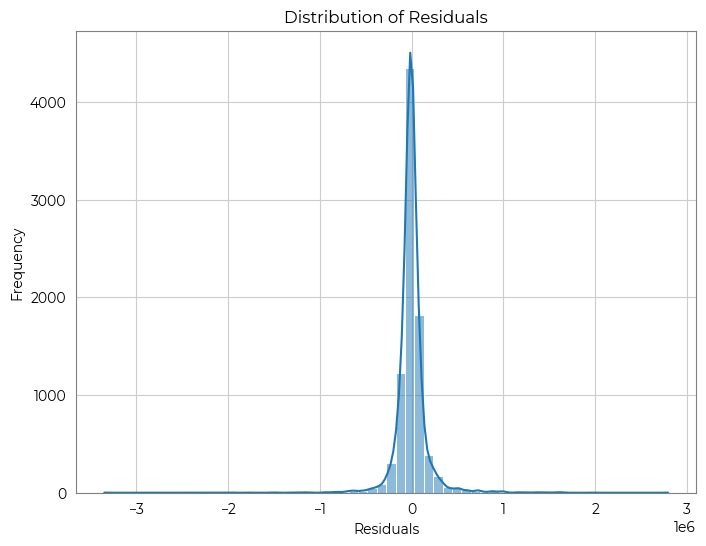

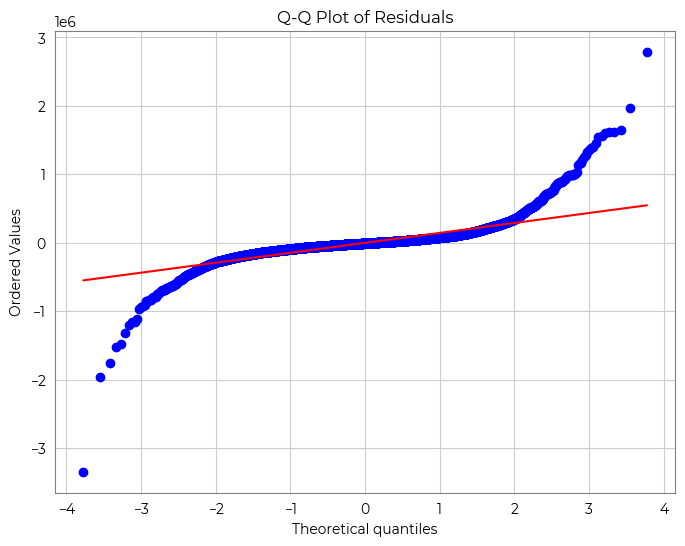

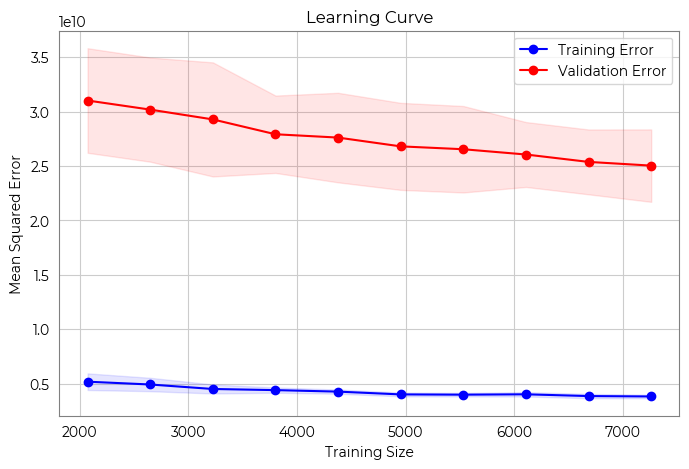

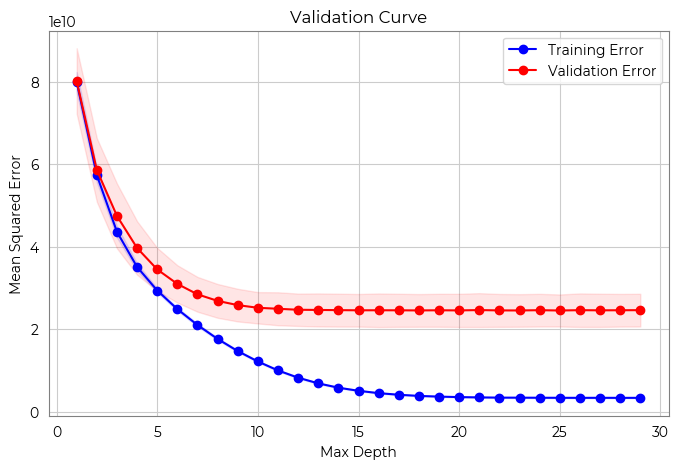

In [ ]:
model_validation(results_df, final_model, X_train, X_test, y_train, y_test)